In [2]:
pip install wordcloud

     ------------------------------------ 300.0/300.0 kB 514.7 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import re
import nltk
from sklearn.feature_extraction.text import CountVectorizer #Data transformation
from sklearn.model_selection import train_test_split #Data testing
from sklearn.linear_model import LogisticRegression #Prediction Model
from sklearn.metrics import accuracy_score #Comparison between real and predicted
from wordcloud import WordCloud #Word visualization
from nltk import word_tokenize
nltk.download('stopwords')
import numpy as np 
import pandas as pd

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


# Data Gatehering

In [6]:
data=pd.read_csv(r"D:\Prodigy InfoTech\Sentiment Analysis\twitter_training.csv\twitter_training.csv",sep = ',', names=['id','country','Label','Text'])
validation=pd.read_csv(r"D:\Prodigy InfoTech\Sentiment Analysis\twitter_validation.csv",sep = ',', names=['id','Company','Label','Text'])

In [7]:
#data.head()
print(validation.head(),"\n\n\n\n\n\n\n",data.head())

     id    Company       Label  \
0  3364   Facebook  Irrelevant   
1   352     Amazon     Neutral   
2  8312  Microsoft    Negative   
3  4371      CS-GO    Negative   
4  4433     Google     Neutral   

                                                Text  
0  I mentioned on Facebook that I was struggling ...  
1  BBC News - Amazon boss Jeff Bezos rejects clai...  
2  @Microsoft Why do I pay for WORD when it funct...  
3  CSGO matchmaking is so full of closet hacking,...  
4  Now the President is slapping Americans in the...   






      id      country     Label  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                                Text  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and 

In [8]:

data=data.drop("id", axis='columns')

validation=validation.drop("id", axis='columns')

In [9]:
print(data.info(),"\n\n\n\n\n\n\n\n\n\n\n\n\n",validation.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   country  74682 non-null  object
 1   Label    74682 non-null  object
 2   Text     73996 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Company  1000 non-null   object
 1   Label    1000 non-null   object
 2   Text     1000 non-null   object
dtypes: object(3)
memory usage: 23.6+ KB
None 












 None


In [10]:
print(data.isnull().sum(),"\n\n\n\n\n\n\n\n",validation.isnull().sum())

country      0
Label        0
Text       686
dtype: int64 







 Company    0
Label      0
Text       0
dtype: int64


In [11]:
print(data['country'].unique(),"\n\n\n\n\n",validation['Company'].unique())

['Borderlands' 'CallOfDutyBlackopsColdWar' 'Amazon' 'Overwatch'
 'Xbox(Xseries)' 'NBA2K' 'Dota2' 'PlayStation5(PS5)' 'WorldOfCraft'
 'CS-GO' 'Google' 'AssassinsCreed' 'ApexLegends' 'LeagueOfLegends'
 'Fortnite' 'Microsoft' 'Hearthstone' 'Battlefield'
 'PlayerUnknownsBattlegrounds(PUBG)' 'Verizon' 'HomeDepot' 'FIFA'
 'RedDeadRedemption(RDR)' 'CallOfDuty' 'TomClancysRainbowSix' 'Facebook'
 'GrandTheftAuto(GTA)' 'MaddenNFL' 'johnson&johnson' 'Cyberpunk2077'
 'TomClancysGhostRecon' 'Nvidia'] 




 ['Facebook' 'Amazon' 'Microsoft' 'CS-GO' 'Google' 'FIFA' 'MaddenNFL'
 'TomClancysRainbowSix' 'AssassinsCreed' 'CallOfDuty' 'Dota2' 'Verizon'
 'NBA2K' 'Nvidia' 'GrandTheftAuto(GTA)' 'RedDeadRedemption(RDR)'
 'Hearthstone' 'ApexLegends' 'Overwatch'
 'PlayerUnknownsBattlegrounds(PUBG)' 'Borderlands' 'PlayStation5(PS5)'
 'johnson&johnson' 'Fortnite' 'Xbox(Xseries)' 'CallOfDutyBlackopsColdWar'
 'HomeDepot' 'Cyberpunk2077' 'TomClancysGhostRecon' 'WorldOfCraft'
 'LeagueOfLegends' 'Battlefield']


In [12]:
# Check for null values in the 'text' column
null_values = data['Text'].isnull()

# Display the rows with null values in the 'text' column
rows_with_null = data[null_values]
print(rows_with_null)

           country     Label Text
61     Borderlands   Neutral  NaN
553    Borderlands   Neutral  NaN
589    Borderlands   Neutral  NaN
745    Borderlands  Positive  NaN
1105   Borderlands  Positive  NaN
...            ...       ...  ...
73972       Nvidia  Positive  NaN
73973       Nvidia  Positive  NaN
74421       Nvidia  Positive  NaN
74422       Nvidia  Positive  NaN
74423       Nvidia  Positive  NaN

[686 rows x 3 columns]


In [13]:
# Replace missing values with mode
column_name = 'Text'
mode_value = data[column_name].mode()[0]
data[column_name].fillna(mode_value, inplace=True)
data.isnull().sum()

country    0
Label      0
Text       0
dtype: int64

# Data Preprocessing

In [14]:
## Text transformation
data["lower"]=data.Text.str.lower() #lowercase
data["lower"]=[str(data) for data in data.lower] #converting all to string
data["lower"]=data.lower.apply(lambda x: re.sub('[^A-Za-z0-9 ]+', ' ', x)) #regex
validation["lower"]=validation.Text.str.lower() #lowercase
validation["lower"]=[str(data) for data in validation.lower] #converting all to stringv
validation["lower"]=validation.lower.apply(lambda x: re.sub('[^A-Za-z0-9 ]+', ' ', x)) #regex

In [15]:
validation

,Company,Label,Text,lower
0,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...,i mentioned on facebook that i was struggling ...
1,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...,bbc news amazon boss jeff bezos rejects clai...
2,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...,microsoft why do i pay for word when it funct...
3,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,...",csgo matchmaking is so full of closet hacking ...
4,Google,Neutral,Now the President is slapping Americans in the...,now the president is slapping americans in the...
...,...,...,...,...
995,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...,toronto is the arts and culture capital of c...
996,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...,this is actually a good move tot bring more vi...
997,Borderlands,Positive,Today sucked so it’s time to drink wine n play...,today sucked so it s time to drink wine n play...
998,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.,bought a fraction of microsoft today small wins


# Positive Wordcloud on Label

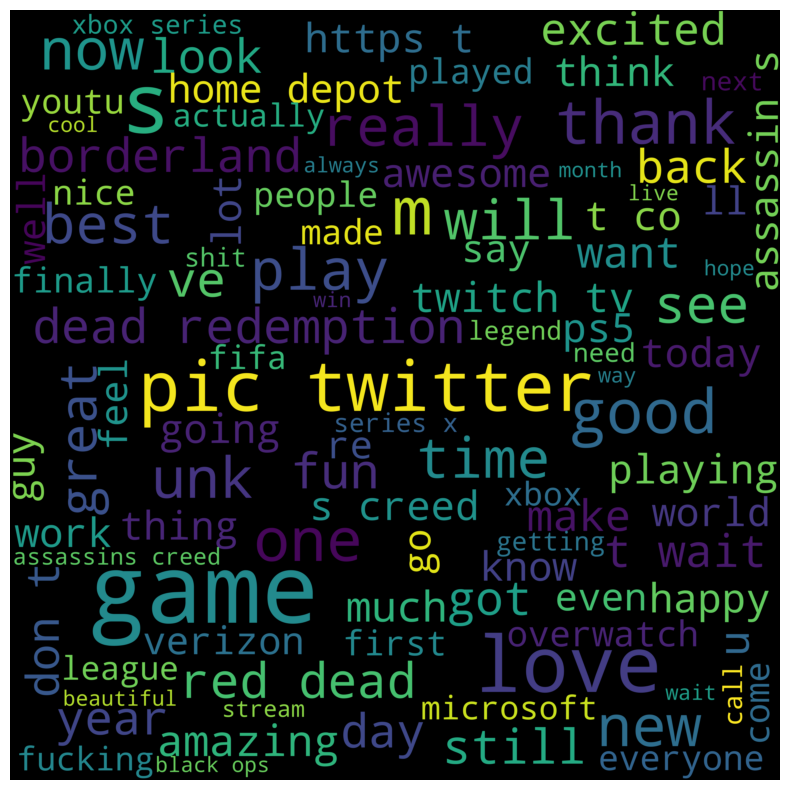

In [16]:
word_cloud_text = ''.join(data[data["Label"]=="Positive"].lower)
#Creation of wordcloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Negative Wordcloud

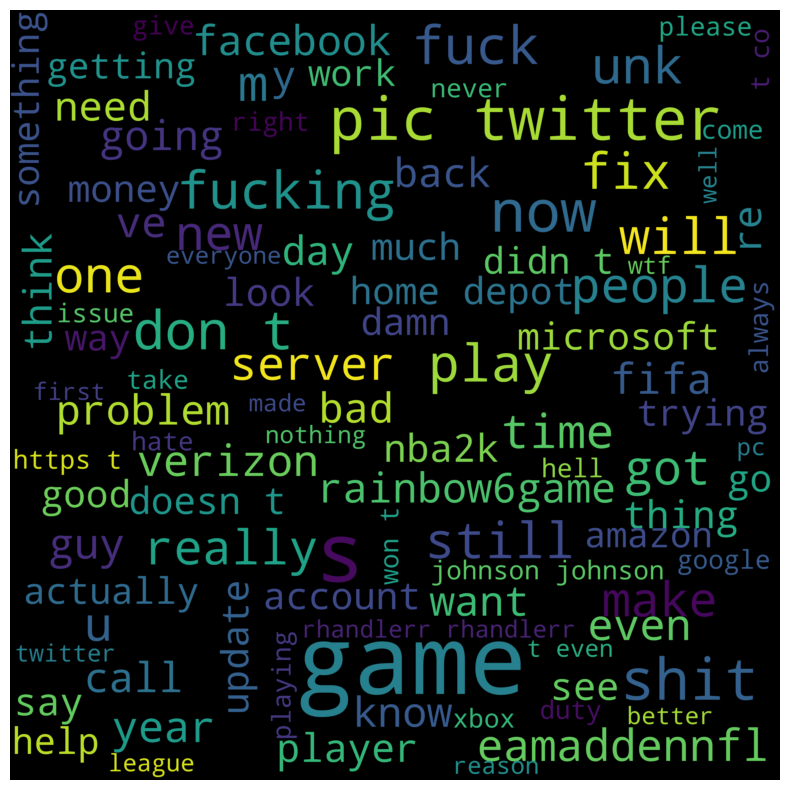

In [17]:
word_cloud_text = ''.join(data[data["Label"]=="Negative"].lower)
#Creation of wordcloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Irrelevant Wordcloud on the basis of label columns

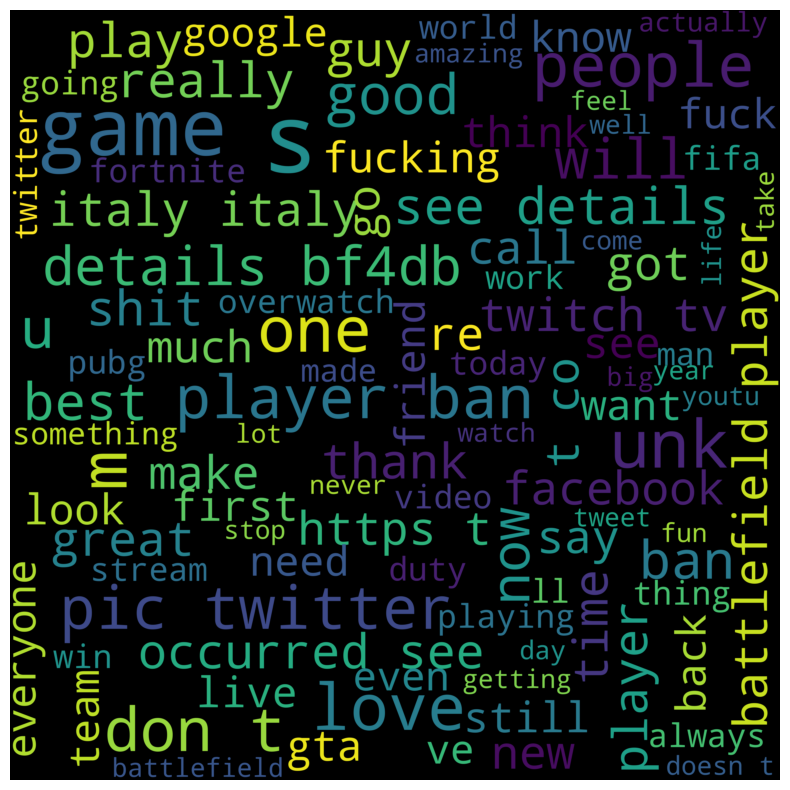

In [18]:
word_cloud_text = ''.join(data[data["Label"]=="Irrelevant"].lower)
#Creation of wordcloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [19]:
#Count information per category
plot1=data.groupby(by=["country","Label"]).count().reset_index()
plot1

,country,Label,Text,lower
0,Amazon,Irrelevant,192,192
1,Amazon,Negative,576,576
2,Amazon,Neutral,1236,1236
3,Amazon,Positive,312,312
4,ApexLegends,Irrelevant,192,192
...,...,...,...,...
123,Xbox(Xseries),Positive,792,792
124,johnson&johnson,Irrelevant,198,198
125,johnson&johnson,Negative,846,846
126,johnson&johnson,Neutral,1014,1014


# Count number on positive or negative or neutral or irrevelent

<Axes: xlabel='Label', ylabel='count'>

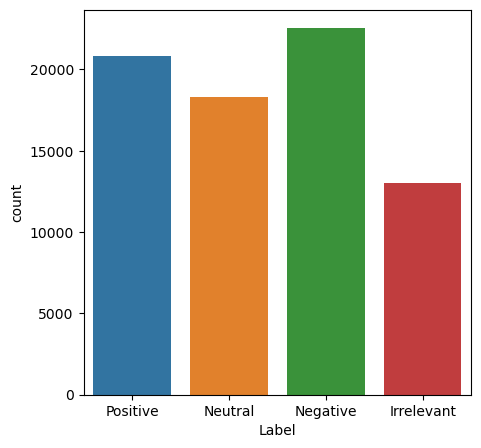

In [20]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='Label', data = data)

# Label on Data

Text(0.5, 1.0, 'Distribution of sentiments')

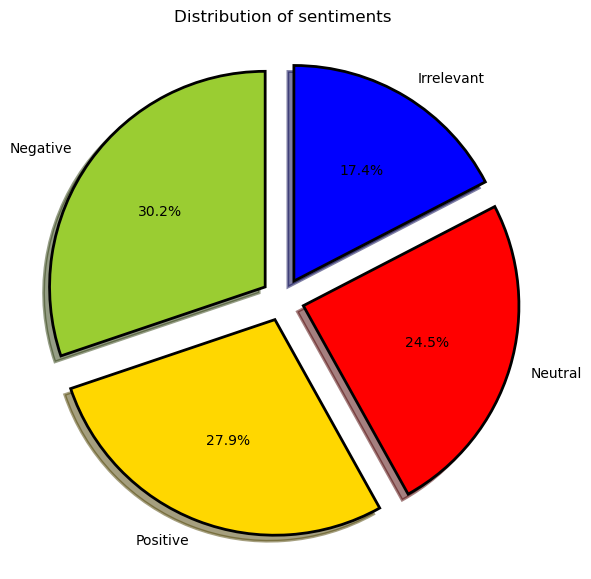

In [21]:
fig = plt.figure(figsize=(7,7))
colors = ("yellowgreen", "gold", "red","blue")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = data['Label'].value_counts()
explode = (0.1,0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

# Validation

Text(0.5, 1.0, 'Distribution of sentiments')

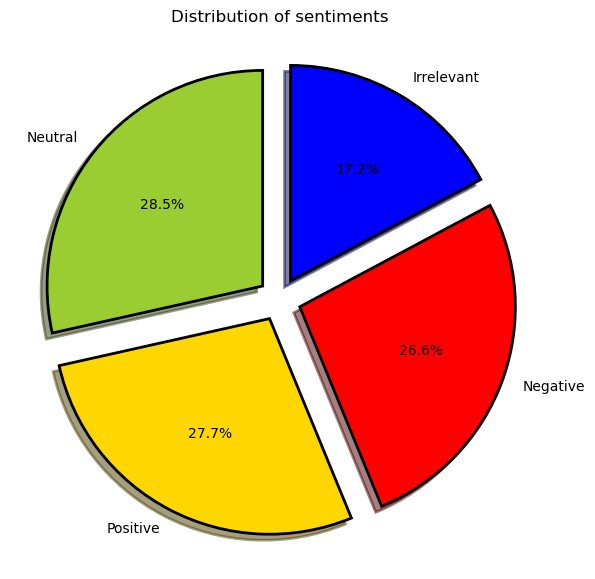

In [22]:
fig = plt.figure(figsize=(7,7))
colors = ("yellowgreen", "gold", "red","blue")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = validation['Label'].value_counts()
explode = (0.1,0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

In [23]:
validation

,Company,Label,Text,lower
0,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...,i mentioned on facebook that i was struggling ...
1,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...,bbc news amazon boss jeff bezos rejects clai...
2,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...,microsoft why do i pay for word when it funct...
3,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,...",csgo matchmaking is so full of closet hacking ...
4,Google,Neutral,Now the President is slapping Americans in the...,now the president is slapping americans in the...
...,...,...,...,...
995,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...,toronto is the arts and culture capital of c...
996,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...,this is actually a good move tot bring more vi...
997,Borderlands,Positive,Today sucked so it’s time to drink wine n play...,today sucked so it s time to drink wine n play...
998,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.,bought a fraction of microsoft today small wins


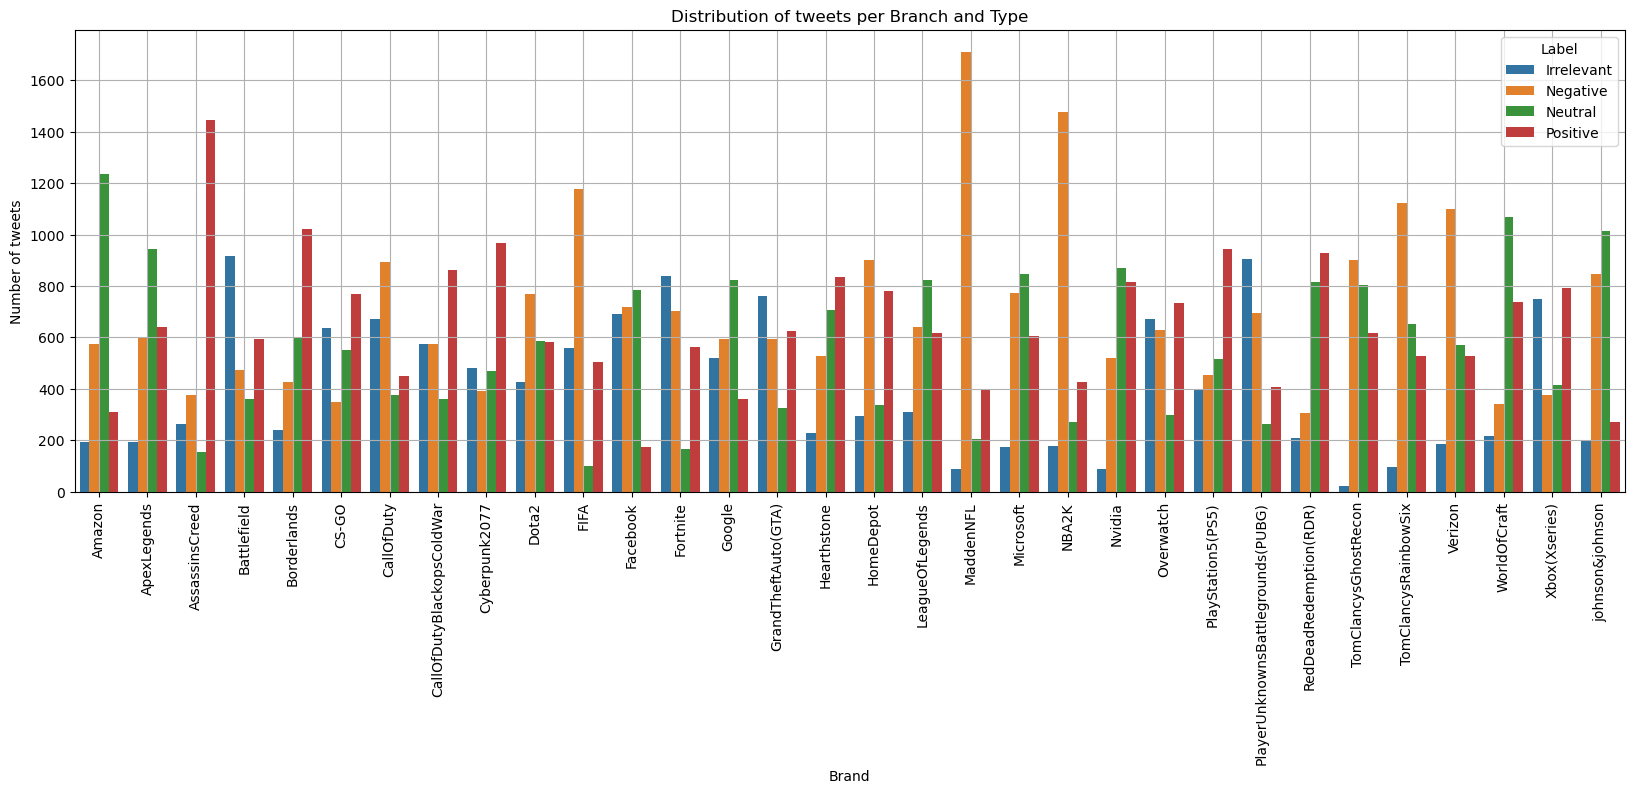

In [24]:
#Figure of comparison per branch
plt.figure(figsize=(20,6))
sns.barplot(data=plot1,x="country",y="Text",hue="Label")
plt.xticks(rotation=90)
plt.xlabel("Brand")
plt.ylabel("Number of tweets")
plt.grid()
plt.title("Distribution of tweets per Branch and Type");

In [25]:
texts = data['Text']

In [26]:
text_lens = [len(t.split()) for t in texts.values]
len_mean = np.mean(text_lens)
len_mean

19.05001205109665

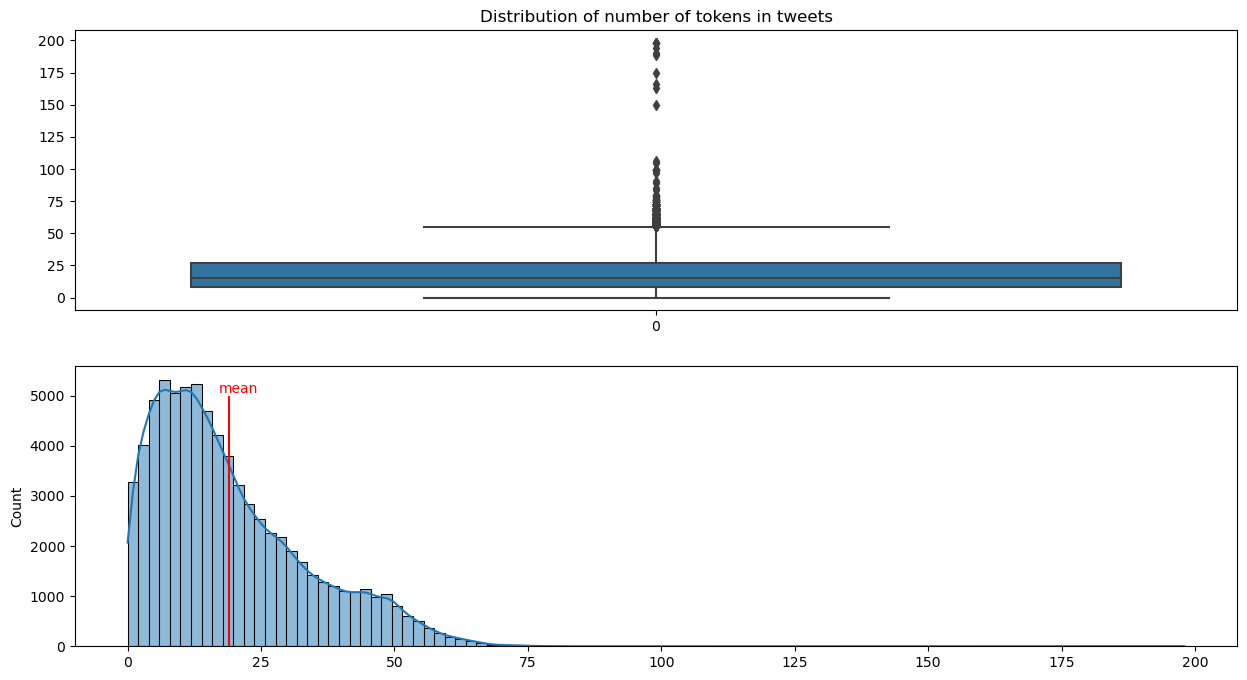

In [27]:
fig, axes = plt.subplots(2, 1, figsize=(15, 8))
axes[0].set_title('Distribution of number of tokens in tweets')
sns.boxplot(text_lens, ax=axes[0])
sns.histplot(text_lens, bins=100, kde=True, ax=axes[1])
axes[1].vlines(len_mean, 0, 5000, color = 'r')
plt.annotate("mean", xy=(len_mean, 5000), xytext=(len_mean-2, 5050),
            color='r')
plt.show()

# fIND Unique Words

In [28]:
#Choosing english stopwords
stopwords_nltk = nltk.corpus.stopwords
stop_words = stopwords_nltk.words('english')
stop_words[:5]

['i', 'me', 'my', 'myself', 'we']

In [29]:
#Initial Bag of Words
bow_counts = CountVectorizer(
    tokenizer=word_tokenize,
    stop_words=stop_words, #English Stopwords
    ngram_range=(1, 1) #analysis of one word
)
bow_counts

CountVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                tokenizer=<function word_tokenize at 0x000002C8F80C93F0>)

In [30]:
#Train - Test splitting
reviews_train, reviews_test = train_test_split(data, test_size=0.2, random_state=0)

In [31]:
#Labels for train and test encoding
y_train_bow = reviews_train['Label']
y_test_bow = reviews_test['Label']

In [33]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [34]:
#Creation of encoding related to train dataset
X_train_bow = bow_counts.fit_transform(reviews_train.lower)
#Transformation of test dataset with train encoding
X_test_bow = bow_counts.transform(reviews_test.lower)

In [35]:
# Logistic regression
model1 = LogisticRegression(C=1, solver="liblinear",max_iter=200)
model1.fit(X_train_bow, y_train_bow)
# Prediction
test_pred = model1.predict(X_test_bow)
print("Accuracy: ", accuracy_score(y_test_bow, test_pred) * 100)

Accuracy:  81.40858271406574


C:\Users\HP\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [36]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
print(confusion_matrix(y_test_bow, test_pred))
print("\n")
print(classification_report(y_test_bow, test_pred))

[[1640  312  180  451]
 [  62 3874  135  398]
 [  86  250 2904  429]
 [  85  253  136 3742]]


              precision    recall  f1-score   support

  Irrelevant       0.88      0.63      0.74      2583
    Negative       0.83      0.87      0.85      4469
     Neutral       0.87      0.79      0.83      3669
    Positive       0.75      0.89      0.81      4216

    accuracy                           0.81     14937
   macro avg       0.83      0.80      0.80     14937
weighted avg       0.82      0.81      0.81     14937

